<a href="https://colab.research.google.com/github/UmeshGayashan/OCR_RegNo_Detection/blob/main/OCR_RegNo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
## Go to the drive and get the data
```



In [24]:
# !-shell command, -q -quiet mode, -U -upgrade
# download files and folders from Google Drive
!pip install -qU gdown
!pip install easyocr

# Mount Google Drive directly
from google.colab import drive
drive.mount('/content/gdrive')

# Verify dataset access using native path
import os

dataset_path = '/content/gdrive/MyDrive/OCR_dataset'
if os.path.exists(dataset_path):
    print(f"Found {len(os.listdir(dataset_path))} files:")
    for idx, file in enumerate(os.listdir(dataset_path), 1):
        print(f"{idx}. {file}")
else:
    print("Error: Folder not found. Check sharing permissions and folder name.")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 25 files:
1. AB_1242_4321.jpg
2. CD_5496_8753.jpg
3. EG_2020_4433.jpg
4. EG_3211_5687.jpg
5. EG_4321_7885.jpg
6. EG_5242_9321.jpg
7. EG_5678_1234.jpg
8. EG_2025_4356.jpeg
9. EG_2025_6424.jpeg
10. EG_2027_5826.jpeg
11. EG_2025_5264.jpeg
12. EG_6257_4326.jpeg
13. EG_4357_2021.jpeg
14. EG_4321_4256.jpeg
15. EG_2027_4256.jpeg
16. EG_2025_4126.jpeg
17. EG_2023_5264.jpeg
18. EG_2025_4321.jpeg
19. EG_2021_4124.jpeg
20. EG_2023_4356.jpeg
21. EG_2020_4112.jpeg
22. EG_2024_4562.jpeg
23. EG_2021_4562.jpeg
24. EG_2023_4126.jpeg
25. EG_2020_2678.jpeg


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import os
import re

In [26]:
# Initialize OCR reader
reader = easyocr.Reader(['en'])

In [44]:
def process_registration_number(image_path):
    # Load image
    image = cv2.imread(image_path)
    original = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply threshold to get binary image
    _, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area (descending)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # The registration number box is typically the second largest contour
    registration_box = contours[1]

    # Get bounding rectangle of the registration box
    x, y, w, h = cv2.boundingRect(registration_box)

    # Extract the registration box region
    roi = original[y:y+h, x:x+w]

    # Display the extracted region
    plt.figure(figsize=(10, 4))
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("Extracted Registration Box")
    plt.axis('off')
    plt.show()

    # Preprocess ROI for better OCR
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi_thresh = cv2.threshold(roi_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # OCR to extract text
    results = reader.readtext(roi)

    # Combine OCR output
    raw_text = " ".join([res[1] for res in results])
    raw_text = raw_text.upper().replace("/", " ").replace("-", " ").replace("_", " ")

    # Match pattern using regex
    pattern = r"(EG|TE|SC)\s*(20[0-9]{2}|2100)\s*\d{4}"
    match = re.search(pattern, raw_text)

    if match:
        reg_number = match.group()
    else:
        reg_number = "[INVALID FORMAT]" + raw_text

    return roi, reg_number

In [45]:
def process_all_images(folder_path):
    results = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)

            # Extract ground truth from filename
            ground_truth = os.path.splitext(filename)[0].replace("_", " ")

            # Process image
            roi, predicted_reg = process_registration_number(image_path)

            # Store results
            results.append({
                'filename': filename,
                'ground_truth': ground_truth,
                'predicted': predicted_reg
            })

            print(f"File: {filename}")
            print(f"Ground Truth: {ground_truth}")
            print(f"Predicted: {predicted_reg}")
            print('-' * 40)

    return results

In [46]:
# Main execution code
dataset_path = '/content/gdrive/MyDrive/OCR_dataset'

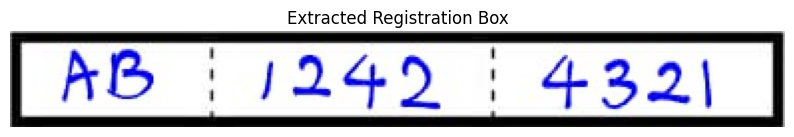

File: AB_1242_4321.jpg
Ground Truth: AB 1242 4321
Predicted: [INVALID FORMAT]AB 1242 4321
----------------------------------------


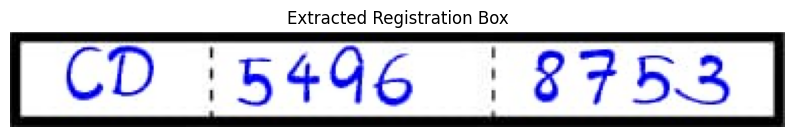

File: CD_5496_8753.jpg
Ground Truth: CD 5496 8753
Predicted: [INVALID FORMAT]CD 5496 8753
----------------------------------------


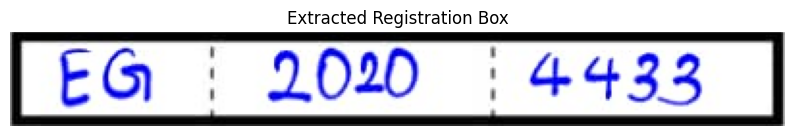

File: EG_2020_4433.jpg
Ground Truth: EG 2020 4433
Predicted: EG 2020 4433
----------------------------------------


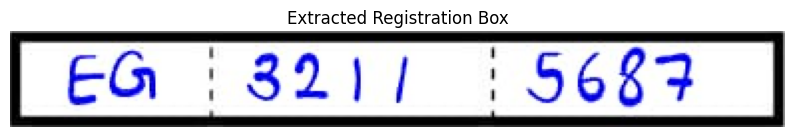

File: EG_3211_5687.jpg
Ground Truth: EG 3211 5687
Predicted: [INVALID FORMAT]EG 32 |   5687
----------------------------------------


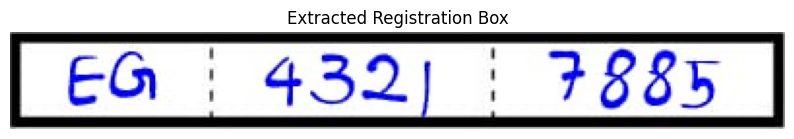

File: EG_4321_7885.jpg
Ground Truth: EG 4321 7885
Predicted: [INVALID FORMAT]EG 4321 7885
----------------------------------------


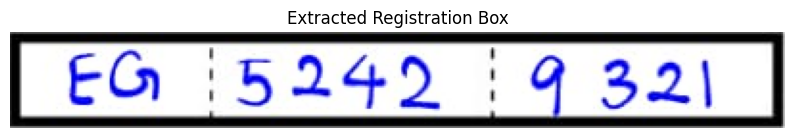

File: EG_5242_9321.jpg
Ground Truth: EG 5242 9321
Predicted: [INVALID FORMAT]EG 5242 321
----------------------------------------


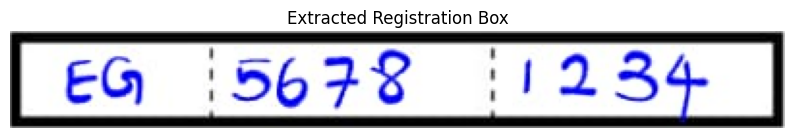

File: EG_5678_1234.jpg
Ground Truth: EG 5678 1234
Predicted: [INVALID FORMAT]EQ 567 8 7234
----------------------------------------


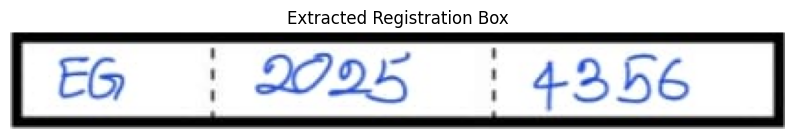

File: EG_2025_4356.jpeg
Ground Truth: EG 2025 4356
Predicted: [INVALID FORMAT]E6 9025 4356
----------------------------------------


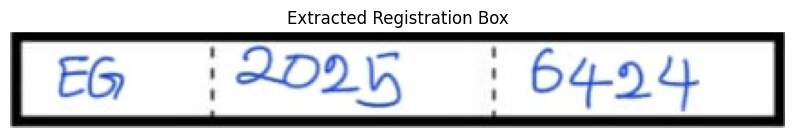

File: EG_2025_6424.jpeg
Ground Truth: EG 2025 6424
Predicted: [INVALID FORMAT]E6 2025 6424
----------------------------------------


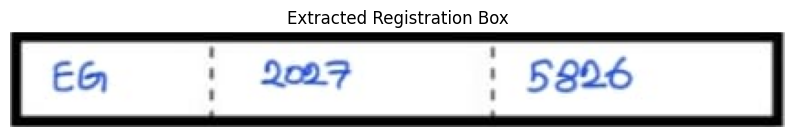

File: EG_2027_5826.jpeg
Ground Truth: EG 2027 5826
Predicted: [INVALID FORMAT]E6 907 5826
----------------------------------------


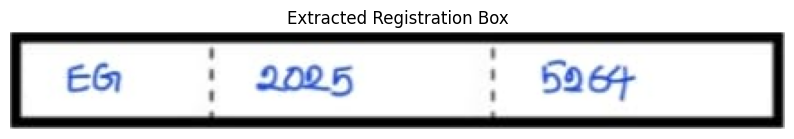

File: EG_2025_5264.jpeg
Ground Truth: EG 2025 5264
Predicted: [INVALID FORMAT]E6 9025 598T
----------------------------------------


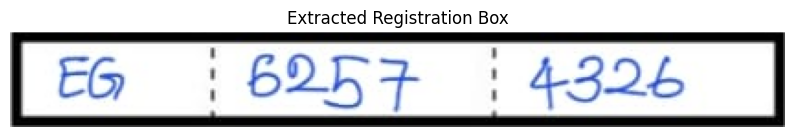

File: EG_6257_4326.jpeg
Ground Truth: EG 6257 4326
Predicted: [INVALID FORMAT]E6 8257 4326
----------------------------------------


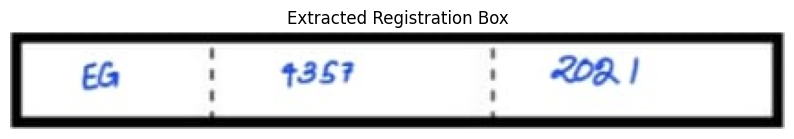

File: EG_4357_2021.jpeg
Ground Truth: EG 4357 2021
Predicted: [INVALID FORMAT]EG 1357 208 |
----------------------------------------


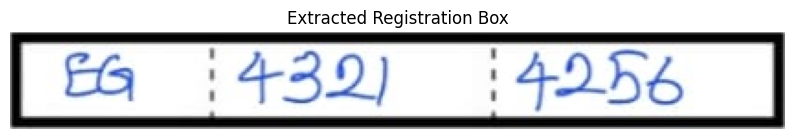

File: EG_4321_4256.jpeg
Ground Truth: EG 4321 4256
Predicted: [INVALID FORMAT]BQ 4321 4256
----------------------------------------


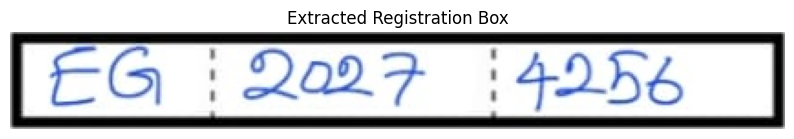

File: EG_2027_4256.jpeg
Ground Truth: EG 2027 4256
Predicted: EG 2027 4256
----------------------------------------


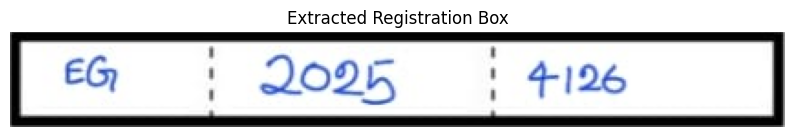

File: EG_2025_4126.jpeg
Ground Truth: EG 2025 4126
Predicted: EG 2025 4126
----------------------------------------


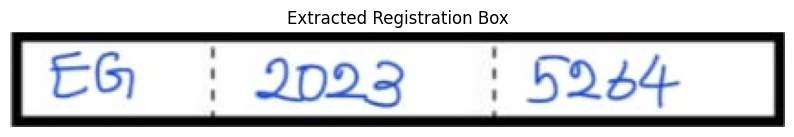

File: EG_2023_5264.jpeg
Ground Truth: EG 2023 5264
Predicted: EG 2023 5284
----------------------------------------


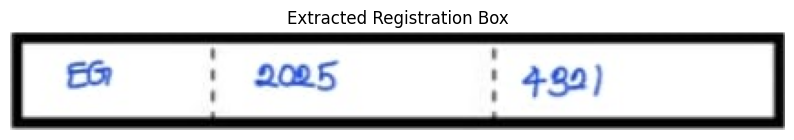

File: EG_2025_4321.jpeg
Ground Truth: EG 2025 4321
Predicted: [INVALID FORMAT]66 9025 490)
----------------------------------------


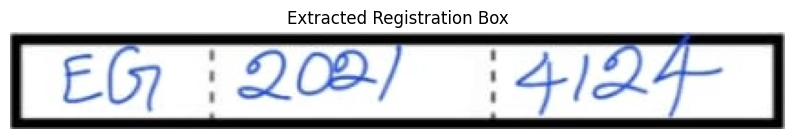

File: EG_2021_4124.jpeg
Ground Truth: EG 2021 4124
Predicted: [INVALID FORMAT]EG 201 412F
----------------------------------------


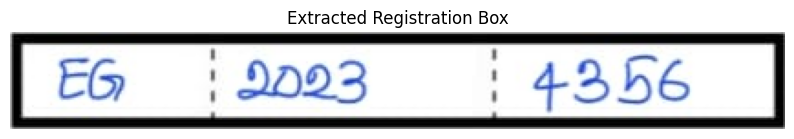

File: EG_2023_4356.jpeg
Ground Truth: EG 2023 4356
Predicted: [INVALID FORMAT]E6 9023 4356
----------------------------------------


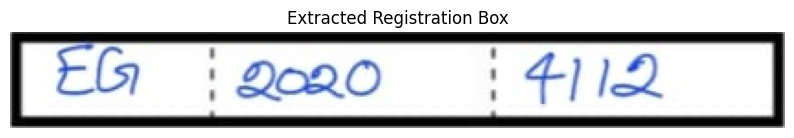

File: EG_2020_4112.jpeg
Ground Truth: EG 2020 4112
Predicted: [INVALID FORMAT]EG DO20 4112
----------------------------------------


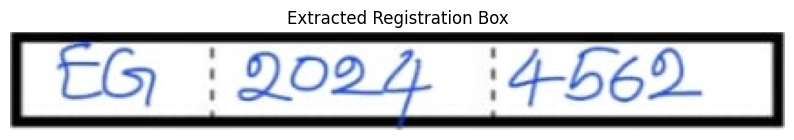

File: EG_2024_4562.jpeg
Ground Truth: EG 2024 4562
Predicted: [INVALID FORMAT]E6 2024 4B62
----------------------------------------


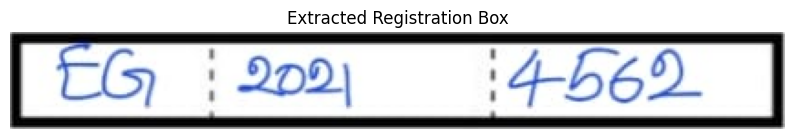

File: EG_2021_4562.jpeg
Ground Truth: EG 2021 4562
Predicted: [INVALID FORMAT]E6 202 | 4662
----------------------------------------


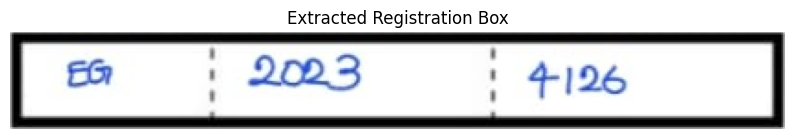

File: EG_2023_4126.jpeg
Ground Truth: EG 2023 4126
Predicted: [INVALID FORMAT]66 203 4126
----------------------------------------


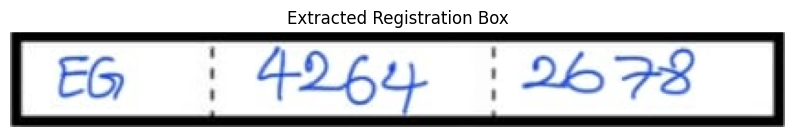

File: EG_2020_2678.jpeg
Ground Truth: EG 2020 2678
Predicted: [INVALID FORMAT]E6 4264 2678
----------------------------------------
Accuracy: 3/25 = 12.00%


In [47]:
# Process all images and get results
results = process_all_images(dataset_path)

# Calculate accuracy
correct = 0
for r in results:
    # Compare extracted reg number with filename
    if r['ground_truth'] == r['predicted']:
        correct += 1

print(f"Accuracy: {correct}/{len(results)} = {correct/len(results)*100:.2f}%")
